# Holmberg II HII Region Spectrum

Figure 2.3 from Chapter 2 of *Interstellar and Intergalactic Medium* by Ryden & Pogge, 2021, 
Cambridge University Press.

The emission line spectrum of an HII region in the dwarf galaxy Holmberg II (Ho II). Atom and ion names 
written in square brackets, such as [O III], refer to forbidden lines.

Data were taken with the Multi-Object Double Spectrograph #1 (MODS1) on the Large Binocular Telescope by 
author R. Pogge and Dr. Kevin Croxall.  Data are in the ASCII text file HoII_MODS1_spec.txt

In [17]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. Fonts and resolution adopted follow CUP style.

In [18]:
figName = 'Fig2_3' 

# graphic aspect ratio = width/height

aspect = 2.5

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# output format and resolution

figFmt = 'png'
dpi = 600

# Graphic dimensions 

plotWidth = dpi*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 6
lwidth = 0.5
axisPad = 5
wInches = textWidth 
hInches = wInches/aspect

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad'] = f'{axisPad}'
plt.rcParams['ytick.major.pad'] = f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

The spectrum of HoII is in a 2-column ASCII text format file:
 * lam = wavelength in Angstroms
 * flam = flux in units of erg/s/cm^2/Angstrom
 

In [19]:
dataFile = 'HoII_MODS1_spec.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

lam = np.array(data['lam'])
flam = np.array(data['flam'])

### Make the Plot

We normalize the horizontal axis to the peak flux in the spectrum, which is the peak of the [O III]5007 emission
line.

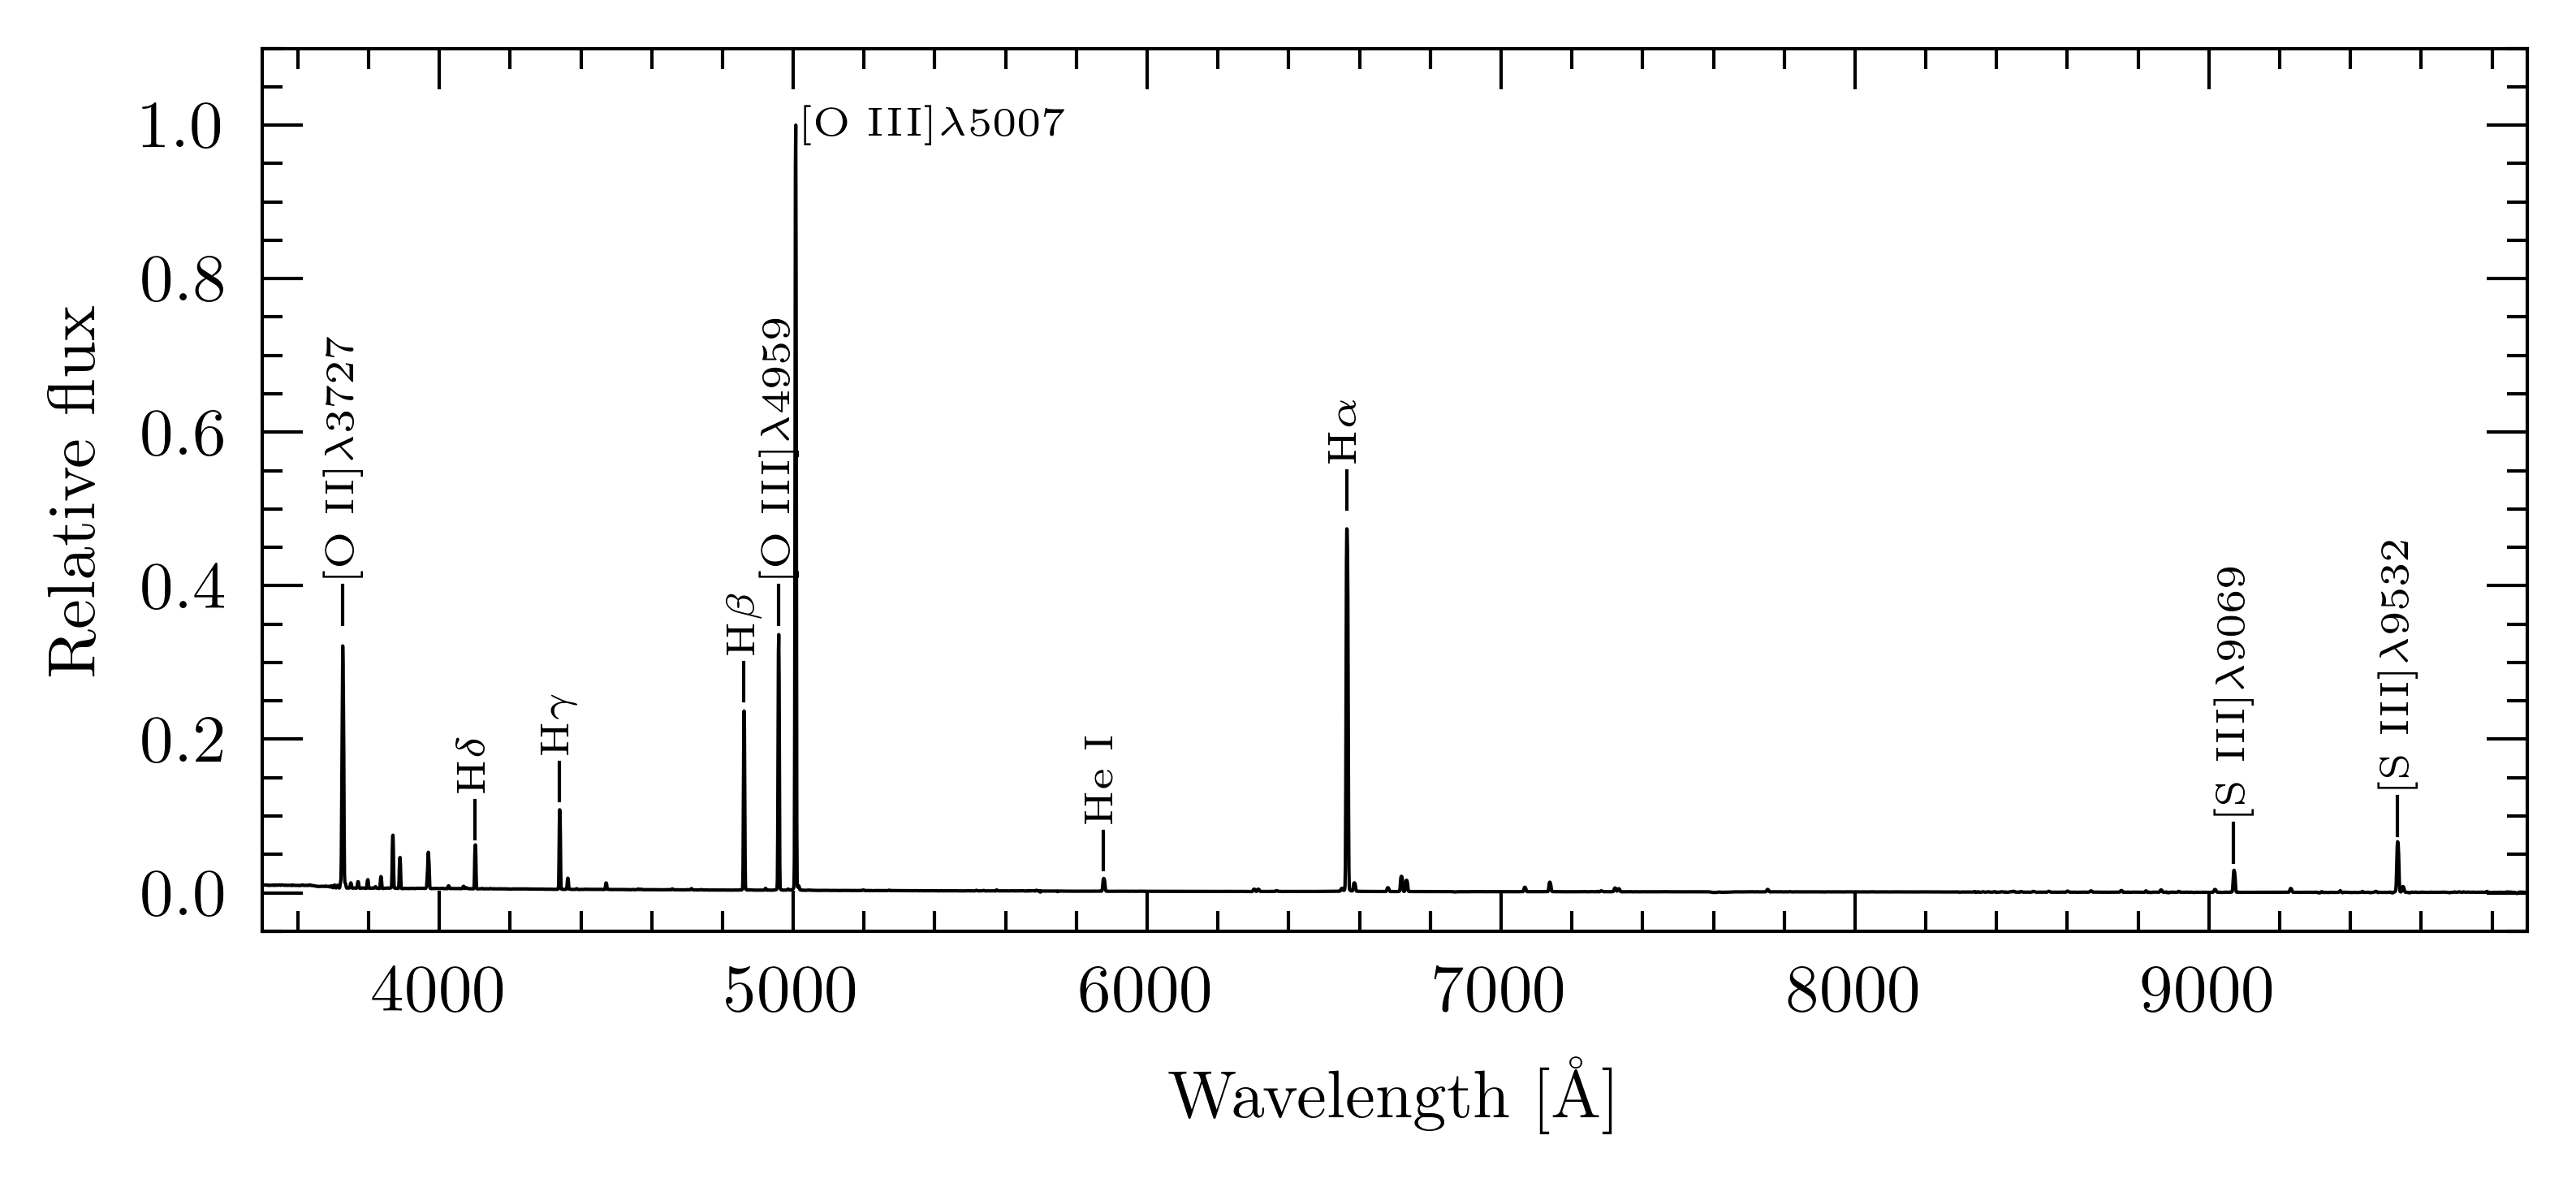

In [20]:
fig,ax = plt.subplots()

fig.set_dpi(dpi)
fig.set_size_inches(wInches,hInches,forward=True)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

lamMin = np.min(lam)
lamMax = np.max(lam)
mxFlux = np.max(flam)
flam /= mxFlux
minFlux = -0.05
maxFlux = 1.1
plt.xlim(lamMin,lamMax)
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_minor_locator(MultipleLocator(200))
plt.xlabel(r'Wavelength [\AA]',fontsize=axisFontSize)

plt.ylim(minFlux,maxFlux)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.ylabel(r'Relative flux',fontsize=axisFontSize)

plt.plot(lam,flam,'-',color='black',lw=lwidth,zorder=10)

# Label major lines

lineID = ['He I','H$\\alpha$','[O II]$\lambda$3727','H$\\beta$',
          '[O III]$\lambda$5007','H$\gamma$','H$\delta$',
          '[S III]$\lambda$9532','[S III]$\lambda$9069',
          '[O III]$\lambda$4959']

xLabel = [5876,6564,3727,4860,5030,4340,4101,9532,9069,4958]
yLabel = [0.03,0.5,0.35,0.25,-1.0,0.12,0.07,0.075,0.04,0.35]
rLabel = [90.0,90.0,90.0,90.0,0.0,90.0,90.0,90.0,90.0,90.0]

for i in range(len(lineID)):
    xl=xLabel[i]
    yl=np.abs(yLabel[i])
    if yLabel[i]>0:
        plt.plot([xl,xl],[yl,yl+0.05],'-',color='black',lw=lwidth)
        plt.text(xl,yl+0.06,lineID[i],verticalalignment='bottom',
                 horizontalalignment='center',rotation=rLabel[i],fontsize=labelFontSize)
    else:
        plt.text(xl,yl,lineID[i],verticalalignment='center',
                 horizontalalignment='left',rotation=rLabel[i],fontsize=labelFontSize)
        
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')